Working on Titanic datset


Importing all important libraries

In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler



Loading Titanic dataset

In [296]:
titanic = pd.read_csv("titanic.csv")

In [297]:
titanic.isna().sum()
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Calculating Age

<Axes: >

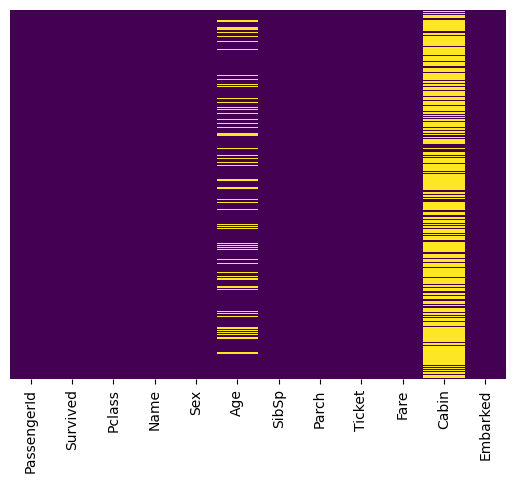

In [298]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')


<Axes: xlabel='Pclass', ylabel='Age'>

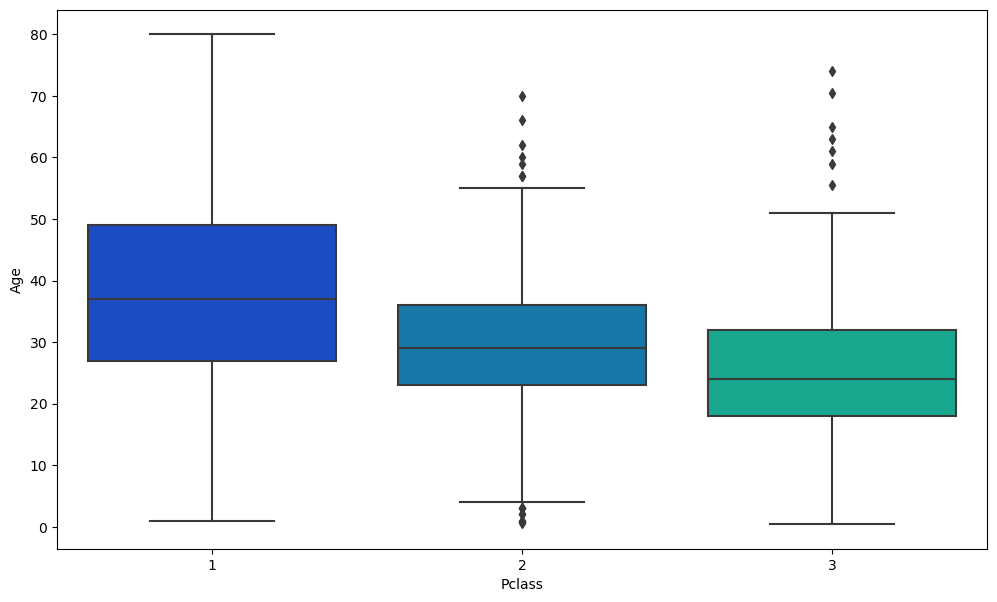

In [299]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

In [300]:
def calculate_age(params):
    Age = params[0]
    Pclass = params[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37
 
        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    
    

In [301]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(calculate_age, axis = 1)

C:\Users\mahim\AppData\Local\Temp\ipykernel_10048\3226532041.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = params[0]
C:\Users\mahim\AppData\Local\Temp\ipykernel_10048\3226532041.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = params[1]


Finding out all Na and unique columns

In [302]:
titanic.drop(titanic[['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked']], axis = "columns", inplace = True)

In [303]:
le = LabelEncoder()
titanic.Sex = le.fit_transform(titanic.Sex)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
...,...,...,...,...,...,...
886,0,2,1,27.0,0,0
887,1,1,0,19.0,0,0
888,0,3,0,24.0,1,2
889,1,1,1,26.0,0,0


In [304]:
values = []
values = list(map(lambda x : titanic[x].value_counts() , titanic.columns))
values



[Survived
 0    549
 1    342
 Name: count, dtype: int64,
 Pclass
 3    491
 1    216
 2    184
 Name: count, dtype: int64,
 Sex
 1    577
 0    314
 Name: count, dtype: int64,
 Age
 24.00    166
 37.00     36
 29.00     31
 22.00     27
 18.00     26
         ... 
 36.50      1
 55.50      1
 0.92       1
 23.50      1
 74.00      1
 Name: count, Length: 88, dtype: int64,
 SibSp
 0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: count, dtype: int64,
 Parch
 0    678
 1    118
 2     80
 5      5
 3      5
 4      4
 6      1
 Name: count, dtype: int64]

Scaling features using standard scaler

In [305]:

for col in titanic.columns :
     std_scaler = MinMaxScaler()
     titanic[col] = std_scaler.fit_transform(titanic[[col]])
titanic


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0.0,1.0,1.0,0.271174,0.125,0.000000
1,1.0,0.0,0.0,0.472229,0.125,0.000000
2,1.0,1.0,0.0,0.321438,0.000,0.000000
3,1.0,0.0,0.0,0.434531,0.125,0.000000
4,0.0,1.0,1.0,0.434531,0.000,0.000000
...,...,...,...,...,...,...
886,0.0,0.5,1.0,0.334004,0.000,0.000000
887,1.0,0.0,0.0,0.233476,0.000,0.000000
888,0.0,1.0,0.0,0.296306,0.125,0.333333
889,1.0,0.0,1.0,0.321438,0.000,0.000000


Dividing Dataset in target and data

In [306]:
X = titanic.drop(titanic[['Survived']], axis = "columns")
Y = titanic.Survived

Cross Validation Technique CV on DecisionTree model on a 

In [307]:
tree = DecisionTreeClassifier()

In [308]:
cross_val = cross_val_score(tree, X, Y, cv = 5)

Cross Validation score

In [309]:
cross_val

array([0.7877095 , 0.81460674, 0.81460674, 0.80337079, 0.83707865])

Hypertuning Decision-tree Classifier

In [310]:

param_distribution = {
    "max_depth" : [5, 10],
    "min_samples_leaf" : [5, 10, 15],
    "criterion" : ["gini", "entropy"] 
}
rm = RandomizedSearchCV(
    tree,
    param_distribution,
    cv=10,
    n_iter=10,
    random_state=42
)

In [311]:
rm.fit(X,Y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10],
                                        'min_samples_leaf': [5, 10, 15]},
                   random_state=42)

In [312]:
rm.best_score_

0.8193882646691636

Now using RandomForestClassifier

In [313]:
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100, 200], 
    'max_depth': [None, 5, 10, 15], 
    'min_samples_split': np.linspace(0.1, 1, 11), 
    'bootstrap': [True, False] 
}
rm = RandomizedSearchCV(
    rfc,
    param_grid,
    cv=5,
    n_iter=10,
    random_state=42 
)
rm.fit(X, Y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15],
                                        'min_samples_split': array([0.1 , 0.19, 0.28, 0.37, 0.46, 0.55, 0.64, 0.73, 0.82, 0.91, 1.  ]),
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42)

In [314]:
rm.best_score_

0.7990772707300232

In [315]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8)

Using KNN Algorithm

In [316]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [317]:
y_pred = classifier.predict(x_test)

In [318]:
classifier.score(x_test,y_pred)

1.0

Using Adabooster Classifier

In [319]:
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [320]:
adb.score(x_test,y_test)

0.8156424581005587

Using Gradiendescent Booster

In [321]:
gdb = GradientBoostingClassifier()
gdb.fit(x_train, y_train)

GradientBoostingClassifier()

In [322]:
gdb.score(x_test,y_test)

0.8379888268156425